importer les bibliothèque nécéssaires

In [1]:
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel
from time import *
from math import *

Question 2 

Temps que met la fonction cree_reseau :  [0.0, 0.0003, 0.0054]
Temps que met la fonction dico_reseau :  [0.0003, 0.0102, 2.1399]


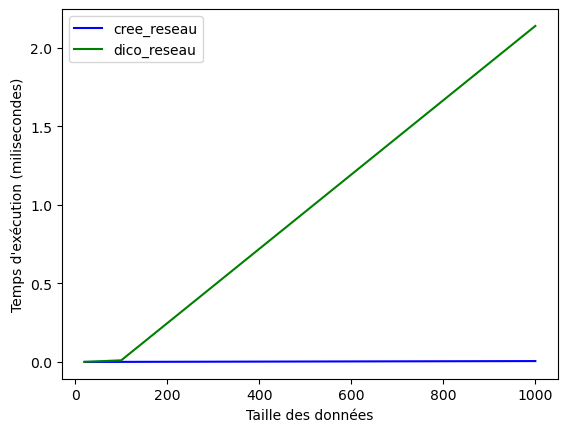

In [2]:
def cree_reseau(amis):                 
    i = 0                                   
    dico_amis = {}  
    while i < len(amis):                    
        prenom = amis[i]                      
        ami = amis [i + 1]                  
        
        if prenom not in dico_amis:           
            dico_amis[prenom] = []            
        dico_amis[prenom].append(ami)
        
        if ami not in dico_amis: 
            dico_amis[ami]= [] 
        dico_amis[ami].append(prenom)

        i += 2                              
    return dico_amis


def dico_reseau(amis):
    reseau = {}
    pers = personnes(amis)
    i = 0
    while i < len(pers):
        reseau[pers[i]] = ses_amis(amis, pers[i])
        i += 1
    return reseau

#fonction qui permet d'utiliser dico_reseau
def personnes(amis):
    return list(set(amis))

def ses_amis(amis, personne):
    result = []
    i = 0
    while i < (len(amis)):
        if amis[i] == personne:
            if i % 2 == 0:
                result.append(amis[i + 1])
            else:
                result.append(amis[i - 1])
        i += 1
    return result
    
#afin d'avoir plusierus valeur pour tester en utilisant ceux de la SAE 1
def lecture_reseau_bis(path):
    f_in=open(path,encoding='utf-8', mode ='r')
    
    lus=[]
    amis=[]
    li=f_in.readline()
    li=li.strip()
    while li!='':
        tab_li=li.split(';')
        if li not in lus :
            # on ajoute la nouvelle paire d'amis
            amis.append(tab_li[0])
            amis.append(tab_li[1])
            # on tient compte de la symetrie de la relation 
            lus.append(li)
            lus.append(tab_li[1]+';'+tab_li[0])
        li=f_in.readline()
        li=li.strip()
    f_in.close()
    return amis

# Mesurer la rapidité d'execution
tailles = [20, 100, 1000]
fichiers = ["files/Communaute1.csv","files/Communaute2.csv","files/Communaute3.csv"]
temps_cree_reseau = []
temps_dico_reseau = []

i = 0
while i < len(fichiers):
    fichier = fichiers[i]
    donnees = lecture_reseau_bis(fichier)

    tic = time()
    cree_reseau(donnees)
    temps_cree_reseau.append(round(time() - tic, 4))
    
    tic = time()
    dico_reseau(donnees)
    temps_dico_reseau.append(round(time() - tic, 4))
    
    i += 1

print("Temps que met la fonction cree_reseau : ",temps_cree_reseau)
print("Temps que met la fonction dico_reseau : ",temps_dico_reseau)

# Affichage graphique
plot(tailles, temps_cree_reseau, "b", label="cree_reseau")
plot(tailles, temps_dico_reseau, "g", label="dico_reseau")
xlabel("Taille des données")
ylabel("Temps d'exécution (milisecondes)")
legend()
show()

Deux compléxité différentes, en effet la compléxité de 'dico_reseau' est quadratique O(n²) tandis que celle de 'cree_reseau' est linéaire O(n). 
La fonction 'cree_reseau' est donc plus rapide que 'dico_reseau'.
Cela correspond bien aux temps d'executions de la ligne bleu inférieur a celle de la ligne verte.

Question 11

Temps que met la fonction comu_dans_amis :  [0.1049, 0.04053, 0.02861, 0.01192]
Temps que met la fonction comu_dans_reseau :  [0.0906, 0.05484, 0.04292, 0.03099]
[3, 2, 2, 1]


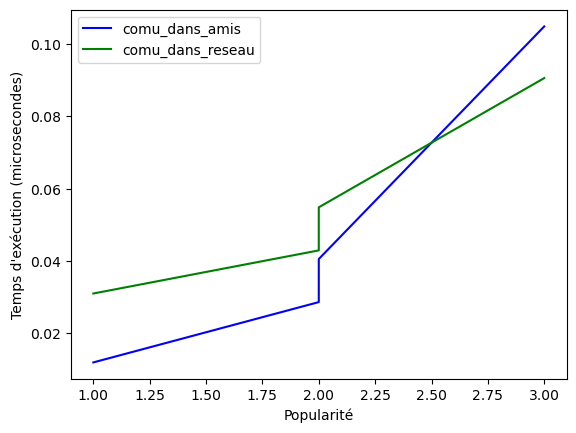

In [4]:
def sont_amis(reseau, personne1, personne2):

    #vérification pour savoir si les deux personnes sont dans le reseau et amis l'un avec l'autre
    if personne1 in reseau and personne2 in reseau[personne1]:
        return True
    if personne2 in reseau and personne1 in reseau[personne2]:
        return True
    else:
        return False

def sont_amis_de(personne1, groupe, reseau):

    i = 0 
    #parcourir le tableau 
    while i < len(groupe):
        #variable qui va nous permettre de voir si toutes les personnes du groupe sont amis 
        personne2 = groupe[i]
        #si la condition est remplie alors 'personne1' n'est pas ami avec tout le monde 
        if not sont_amis(reseau, personne1, personne2):
            return False
        i += 1

    return True

def liste_personnes(dico):

    #liste_amis contient toutes les personnes du reseau 
    liste_amis = list(dico.keys())

    return liste_amis
 
def comu (reseau, groupe):
    #tableau vide qui va stocker les membres qui sont tous amis
    communaute = []
    i = 0 
    #boucle qui va vérifié si la personne à l'indice 'i' est ami avec tout le groupe
    while i < len(groupe):
        membre = groupe[i]
        j = 0
        compatible = True
        #boucle qui parcoure tout le groupe a partir du début pour savoir si 'i' est ami avec tout le groupe
        while j < len(communaute):
            #si cette condition est remplie alors la personne à l'indice 'i' n'est pas ami avec tout le groupe 
            if not sont_amis(reseau, membre, communaute[j]):
                compatible = False
            j += 1
            #si True alors on ajoute la personne de l'indice 'i' à la communauté
        if compatible: 
            communaute.append(membre)
        i += 1

    return communaute 

def swap_tab(tab, i, j):                #fonction qui va nous permettre d'utilisé le tri à bulle 
    tab[i], tab[j] = tab[j], tab[i]

def tri_popu (reseau, groupe):
    n = len(groupe)                     #utilisation du tri à bulle 
    while 1 < n:
        i = 0
        while i < n-1 :
            #compare la taille des deux listes d'ami si la liste de 'i' est plus grande que la liste de 'i+1' 
            #alors on échange l'indice grâce à la fonction 'swap_tab'
            if len(reseau[groupe[i]]) < len(reseau[groupe[i+1]]):
                swap_tab(groupe, i, i+1)
            i += 1
        n-=1
    return groupe

def comu_dans_reseau(reseau):
    #variable qui contient tous les membres du réseau 
    personne = list(reseau.keys())
    #on tri par ordre décroissant les membres du réseau
    tri_popu(reseau, personne)
    #on définit une communauté 
    communaute = comu(reseau, personne)
    
    return communaute 

def comu_dans_amis(reseau, personne):
    #si c'est vide 
    if len(personne) <= 0:
        return []
    #variable qui va contenir les membres d'une communauté 
    communaute = []
    #la communauté commence par la personne en paramètre (obligé de faira parti de la communauté) 
    communaute.append(personne)
    #variable qui contient les membres du réseau
    reste = reseau[personne]
    reste = tri_popu(reseau, reste)
    #parcourir les membres de la communauté
    i = 0 
    while i < len(reste):
        ajout = reste[i]
        #si 'i' est amis avec toute la communaute alors on l'ajoute à la communauté 
        if sont_amis_de (ajout, communaute, reseau):
            communaute.append(ajout)
        i += 1

    return communaute


temps_comu_dans_amis = []
temps_comu_dans_reseau = []

reseau = {
        "Alice" : ["Bob", "Dan"],
        "Bob" : ["Alice", "Carl", "Dan"],
        "Carl" : ["Bob"],
        "Dan" : ["Alice", "Bob"]
       } 
popu_parti = []
participants = liste_personnes(reseau)
tri_popu(reseau, participants)

i = 0
while i < len(participants):
    popu_parti.append(len(reseau[participants[i]]))

    tic = time()
    comu_dans_amis(reseau, participants[i])
    tac = time()
    temps_comu_dans_amis.append(round((tac - tic) * 10000, 5))
    
    tic = time()
    comu_dans_reseau(reseau)
    tac = time()
    temps_comu_dans_reseau.append(round((tac - tic)*10000, 5))
    i += 1

print("Temps que met la fonction comu_dans_amis : ",temps_comu_dans_amis)
print("Temps que met la fonction comu_dans_reseau : ",temps_comu_dans_reseau)
print(popu_parti)

plot(popu_parti, temps_comu_dans_amis, "b", label="comu_dans_amis")
plot(popu_parti, temps_comu_dans_reseau, "g", label="comu_dans_reseau")
xlabel("Popularité")
ylabel("Temps d'exécution (microsecondes)")
legend()
show()

Deux compléxité différentes, en effet la compléxité de 'comu_dans_reseau' est quadratique O(n²) tandis que celle de 'comu_dans_amis' est quadratique O(n²). En théorie la fonction 'comu_dans_amis'aussi rapide que 'comu_dans_reseau'. Mais le graphique nous montre que 'comu_dans_amis' met plus de temps à s'executer.